# Produce some plots of importation probabilities

Use the analytical formulas from Wallinga and Scalia Tomba


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from tqdm import tqdm


In [2]:
def myF(q,La):
    return (1. - (np.exp(-(1-q)*La)))

In [3]:
qran = np.arange(0,1.001,0.001)
Laran = np.arange(0,100.1,0.1)
lq = len(qran)
ll = len(Laran)
Fmat = np.zeros((lq,ll))
for i, q in enumerate(qran):
    for j, La in enumerate(Laran):
        Fmat[i,j] = myF(q,La)

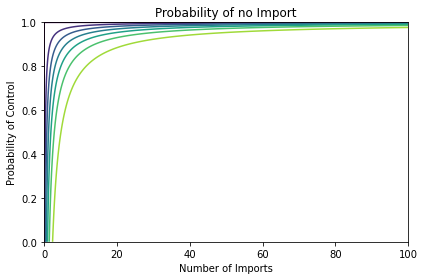

In [4]:
plt.contour(Laran,qran,Fmat)
plt.xlabel('Number of Imports')
plt.ylabel('Probability of Control')
plt.title('Probability of no Import')
plt.tight_layout()

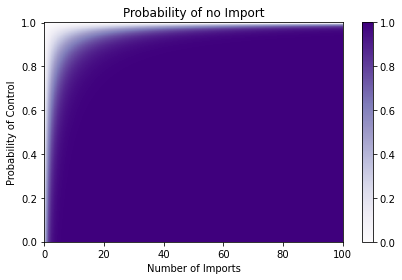

In [5]:
plt.pcolor(Laran,qran,Fmat,cmap='Purples',shading='auto')
plt.xlabel('Number of Imports')
plt.ylabel('Probability of Control')
plt.colorbar()
plt.title('Probability of no Import')
plt.tight_layout()

In [6]:
def myDeltaTau(tD,qq):
    return ((-np.log(1.-qq)/np.log(2))*tD)

In [7]:
qran = np.arange(0,1.001,0.001)
tDran = np.arange(3,21,0.1)
lq = len(qran)
lt = len(tDran)
dtaumat = np.zeros((lq,lt))
for i, q in enumerate(qran):
    for j, t in enumerate(tDran):
        dtaumat[i,j] = myDeltaTau(t,q)

<ipython-input-6-b176d8508058>:2: RuntimeWarning: divide by zero encountered in log
  return ((-np.log(1.-qq)/np.log(2))*tD)


In [ ]:
# Trick is probably to do contour plot - i.e. rearrange the 

In [10]:
cmp = plt.cm.get_cmap('Purples', 512)
newcmp = ListedColormap(cmp(np.linspace(0,1,512))**(6))

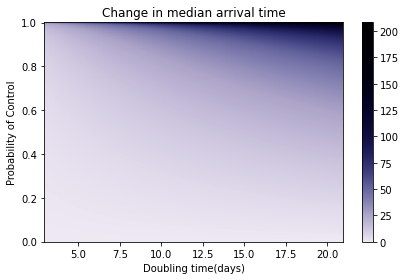

In [11]:
plt.pcolor(tDran,qran,dtaumat,cmap=newcmp,shading='auto')
plt.xlabel('Doubling time(days)')
plt.ylabel('Probability of Control')
plt.colorbar()
plt.title('Change in median arrival time')
plt.tight_layout()

In [12]:
def myq(tD,dtau):
    return (1. - np.exp(-(dtau/tD)*np.log(2)))

In [36]:
dtran = np.array([1., 7., 14., 28., 60.])
tDran = np.arange(0,30.1,0.1)
ld = len(dtran)
lt = len(tDran)
qmat = np.zeros((ld,lt))
for i, d in enumerate(dtran):
    for j, t in enumerate(tDran):
        qmat[i,j] = myq(t,d)

<ipython-input-12-13cb713a5527>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return (1. - np.exp(-(dtau/tD)*np.log(2)))


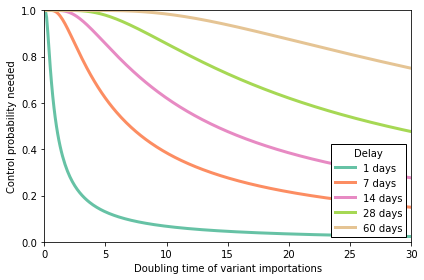

In [67]:
cmp = plt.cm.get_cmap('Set2', ld+1)
plt.figure(figsize=(6,4))
for i, d in enumerate(dtran):
    plt.plot(tDran,qmat[i,:],label= str(int(d)) + ' days',c=cmp(i),lw=3)
plt.xlim((np.min(tDran),np.max(tDran)))
plt.ylim((0,1))
plt.legend(title='Delay', loc=4, framealpha=1., edgecolor='black', fancybox=False)
plt.xlabel('Doubling time of variant importations')
plt.ylabel('Control probability needed')
plt.tight_layout()
plt.savefig('./var_q.pdf')

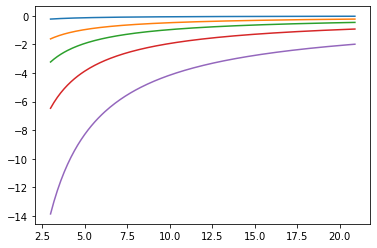

In [18]:
for i, d in enumerate(dtran):
    plt.plot(tDran,np.log(1.-qmat[i,:]))

## Jacob

In [3]:
def deltatau(q, tD):
    return -(np.log(1-q)/np.log(2))*tD

In [293]:
gam = 1/7
R0 = 4
Rvec = np.array([1.5, 2, 2.5, 3, 3.5, 4])
beta = R0*gam
cran = np.arange(0,1.01,0.01)
tvec=np.linspace(0, 100)
qt_mat = np.zeros((len(Rvec), len(cran)))
for r, R in enumerate(Rvec):  
    for i, k in enumerate(cran):
        beta = R*gam
        def dp(u, t):
            dpdt = c*beta*np.exp(u[0])
            return np.array((gam-c*beta, dpdt))

        method = ForwardEuler(dp)
        method.set_ic(np.array((0, 0)))
        P, t = method.solver(time_points=tvec)
        qt = 1-1/(P[1,:] + np.exp(P[0,:]))[-1]
        qt_mat[r, i] = qt


tD_vec = np.array([0.5, 1, 3, 5, 7, 10])
dt_mat = np.zeros((len(Rvec), len(tD_vec), np.shape(qt_mat)[1]))
for i, t in enumerate(tD_vec):
    for r, R in enumerate(Rvec):
        dt_mat[r, i, :] = deltatau(qt_mat[r, :], t)

    
    

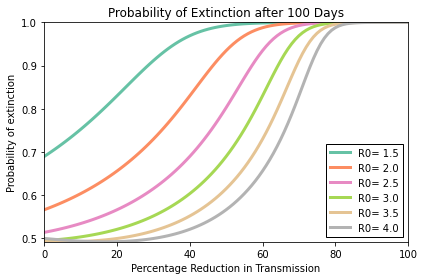

In [300]:
cmp = plt.cm.get_cmap('Set2', ld+1)
plt.figure(figsize=(6,4))
for r, R in enumerate(Rvec):
    plt.plot((1-cran)*100, qt_mat[r,:], label= 'R0= ' + str(R),c=cmp(r),lw=3 )
plt.xlim((0,100))
plt.ylim((np.min(qt_mat), 1))
plt.legend(loc=4, framealpha=1., edgecolor='black', fancybox=False)
plt.title('Probability of Extinction after 100 Days')
plt.xlabel('Percentage Reduction in Transmission')
plt.ylabel('Probability of extinction')
plt.tight_layout()
plt.savefig('./var_p.pdf')

(101,) (101,) 0
(101,) (101,) 1
(101,) (101,) 2
(101,) (101,) 3
(101,) (101,) 4
(101,) (101,) 5


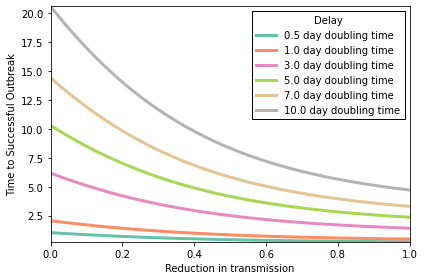

In [282]:
cmp = plt.cm.get_cmap('Set2', ld+1)
plt.figure(figsize=(6,4))
for i, d in enumerate(tD_vec):
    plt.plot(cran,dt_mat[r, i, :],label= str(d) + ' day doubling time',c=cmp(i),lw=3)
plt.xlim((0,1))
plt.ylim((np.min(dt_mat[r, :, :]),np.max(dt_mat[r, :, :])))
#plt.ylim((np.min(dt_mat), np.max(dt_mat)))
plt.legend(title='Delay', loc=1, framealpha=1., edgecolor='black', fancybox=False)
plt.xlabel('Reduction in transmission')
plt.ylabel('Time to Successful Outbreak')
plt.tight_layout()
# plt.savefig('./var_c.pdf')

In [2]:
import scipy.optimize as op

In [407]:

R0 = 2
Rvec = np.array([1.5, 2, 2.5, 3, 3.5, 4])
beta = R0*gam
cran = np.arange(0,1.01,0.01)
tvec=np.linspace(0, 100)
qt_vec = np.zeros(len(cran))
Tmax = tvec[-1]
for i, c in enumerate(cran):
    def dp(u, t):
        dpdt = c*beta*np.exp(u[0])
        return np.array((gam-c*beta, dpdt))

    method = ForwardEuler(dp)
    method.set_ic(np.array((0, 0)))
    P, t = method.solver(time_points=tvec)
    qt = 1-1/(P[1,:] + np.exp(P[0,:]))[-1]
    qt_vec[i] = qt
    if beta*c != gam:
        qt_vec[i] = (gam*(1-np.exp((beta*c - gam)*Tmax)))/(gam- beta*c*np.exp((beta*c - gam)*Tmax))
    else:
        qt_vec[i] = 1-1/(gam*Tmax+1)
dtran = np.array([1., 7., 14., 28., 60.])
tDran = np.arange(0.1,10.1,0.1)
ld = len(dtran)
lt = len(tDran)
# qmat = np.zeros((ld,lt))
# qmat_error = np.zeros_like(qmat)
# for i, d in enumerate(dtran):
#     for j, t in enumerate(tDran):
#         def myq_Jacob(clevel):
#             q = (gam*(1-np.exp((beta*clevel-gam)*100)))/(gam-beta*clevel*np.exp(beta*clevel-gam)*100)
#             return 1-np.exp(-(d*(beta/gam - 1))/t) - q
#         qmat[i,j] = op.root_scalar(myq_Jacob,x0=0, x1=1).root
#         qmat_error[i,j]  = myq_Jacob(qmat[i,j].copy())

tD_vec = np.array([0.5, 1, 3, 5, 7, 10])
dt_mat = np.zeros((len(tD_vec), len(qt_vec)))
for i, t in enumerate(tD_vec):
        dt_mat[i, :] = deltatau(qt_vec, t)

In [377]:
c=0
def dp(u, t):
    dpdt = c*beta*np.exp(u[0])
    return np.array((gam-c*beta, dpdt))

method = ForwardEuler(dp)
method.set_ic(np.array((0, 0)))
P, t = method.solver(time_points=tvec)
qt = 1-1/(P[1,:] + np.exp(P[0,:]))[-1]
dt = 10
deltatau(qt, dt)

206.0992915567707

In [34]:

# =============================================================================
# Class for solving ODEs
# =============================================================================
class ODESolver:
    def __init__(self, f):
        self.f = f
    
    def advance(self):
        raise NotImplementedError
    
    def set_ic(self, u0):
        if not isinstance(u0, float):
            self.u0 = u0.astype(float)
        else:
            self.u0 = u0
    
    def solver(self, time_points):
        self.t = np.asarray(time_points)
        self.tlen = len(self.t)
        if isinstance(self.u0, float):
            self.numeqs=1
        else:
            self.numeqs = np.shape(self.u0)[0]
        self.u = np.zeros((self.numeqs, self.tlen))
        self.u[:,0] = self.u0
        for k in range(0,self.tlen-1):
            self.k=k
            self.u[:, k+1] = self.advance()
        return self.u, self.t
    

class ForwardEuler(ODESolver): # Runs faster than Runge Kutta
    def advance(self):
        u, f, k, t = self.u, self.f, self.k, self.t
        dt = t[k+1] - t[k]
        unew = u[:, k] + dt*f(u[:, k], t[k])
        return unew

class RungeKutta4(ODESolver): # Alternatively, can use Runge Kutta (may be preferable to Euler if inhomogeneous rates are particularly pathological)
    def advance(self):
        u, f, k, t = self.u, self.f, self.k, self.t
        numeqs = np.shape(u)[0]
        dt = t[k+1]-t[k]
        dt2 = dt/2.0
        unew = np.zeros(numeqs)
        
        K1 = dt*f(u[:, k], t[k])
        K2 = dt*f(u[:, k] + 0.5*K1, t[k]+dt2)
        K3 = dt*f(u[:, k] + 0.5*K2, t[k] + dt2)
        K4 = dt*f(u[:, k] + K3, t[k] + dt)
    
        unew = u[:, k] + (1/6.0)*(K1 + 2*K2 + 2*K3 + K4)
        return unew
    
    

In [134]:
  
# =============================================================================
# Class for extinction probability of multi-type branching process (MTBP)
# =============================================================================

class MTBP_extinct:
    def __init__(self, offspring):
        self.offspring = offspring
    def set_lifespans(self, omega):
        self.omega = omega
    def set_immigration(self, eta):
        
        self.eta = eta
    
    def set_odes(self, u, t):
        omega = self.omega
        P = self.offspring
        eta = self.eta
        if isinstance(eta(t), float):
            self.numeqs=1
            deriv = np.zeros(self.numeqs + 1)
            deriv[0] = -omega(t)*u[0] + omega(t)*P(u[0:-1], t)[0]
            sumqs = eta(t)*u[0]
            deriv[-1] = -np.sum(eta(t))*u[-1] + u[-1]*sumqs
        else:
            self.numeqs = len(eta(t))
            sumqs = 0
            deriv = np.zeros(self.numeqs + 1)
            for i in range(0, self.numeqs):
                deriv[i] = -omega(t)[i]*u[i] + omega(t)[i]*P(u[0:-1], t)[i]

                sumqs += eta(t)[i]*u[i]

            deriv[-1] = -np.sum(eta(t))*u[-1] + u[-1]*sumqs

        return deriv

    def solve_odes(self, set_odes, t, ics, n0, methodclass=RungeKutta4, Full = False):
        method = methodclass(set_odes)
        method.set_ic(u0=ics)
        R, t = method.solver(time_points=t)
        numqs = np.shape(R)[0] - 1
        tlen = len(t)
        Qprod = np.ones(tlen)
        r = R[-1,:]
        if Full:
            return R
        else:
            if isinstance(n0, float):
                for i in range(0, numqs):
                    Qprod *= R[i,:]**(n0)
            else:
                for i in range(0, numqs):
                    Qprod *= R[i,:]**(n0[i])
            rho = r*Qprod
            sol = np.stack((Qprod, rho), axis=0)
            return sol
    
    def time_to_pextinct(self, t, p, sol):
        rho = sol[-1,:]
        numqs = np.shape(sol)[0] - 1
        q = np.ones_like(rho)
        for i in range(0, numqs):
            q*=sol[i, :]
        if isinstance(p, float):
            qwhere = np.where(q>=p)[0]
            rhowhere = np.where(rho>=p)[0]
            if len(qwhere)>0:
                qmin = np.min(t[np.where(q>=p)])
            else:
                qmin = np.inf
            if (len(rhowhere)>0) and (rho[-1]>=p):
                rhomin = np.min(t[np.where(rho>=p)])
            else:
                rhomin =  np.inf
            return np.array((qmin, rhomin))
        elif len(p)>1:
            qmin = np.zeros_like(p)
            rhomin = np.zeros_like(p)
            extinct_times = np.zeros((len(p), 2)) 
            for j in range(0, len(p)):
                qwhere = np.where(q>=p[j])[0]
                rhowhere = np.where(rho>=p[j])[0]
                if len(qwhere)>0:
                    qmin[j] = np.min(t[np.where(q>=p[j])])
                else:
                    qmin[j] = np.inf
                if (len(rhowhere)>0) and (rho[-1]>=p[j]):
                    rhomin[j] = np.min(t[np.where(rho>=p[j])])
                else:
                    rhomin[j] =  np.inf
            extinct_times[:,0] = qmin
            extinct_times[:,1] = rhomin
            return(extinct_times)
    
    def qr_final(self, sol):
        sol = sol[-1,:]
        q_final = np.prod(sol[0:-1,-1])
        rho_final = sol[-1, -1]
        return [q_final, rho_final]
    
    def set_Omega(self, Omega):
        self.Omega=Omega
        return None
    
    def set_mean_odes(self, u, t):
        try:
            Omega = self.Omega
        except NotImplementedError:
            print("Need to set Omega first!")
        P = self.offspring
        eta = self.eta
        omega = self.omega
        if isinstance(u, float):
            self.meaneqs=1
            deriv = np.zeros(self.meaneqs)
            deriv[0] = u*Omega(u, t) + eta(t)
            return deriv
        else:
            self.meaneqs = len(u)
            meaneqs = self.meaneqs
            deriv = np.zeros(meaneqs)
            deriv = u@Omega(u, t) + eta(t)
            return deriv
        
    def solve_mean_odes(self, set_mean_odes, t, ics, methodclass=RungeKutta4):
        method = methodclass(set_mean_odes)
        method.set_ic(u0=ics)
        M, t = method.solver(time_points=t)
        return M
        

# Variants Paper

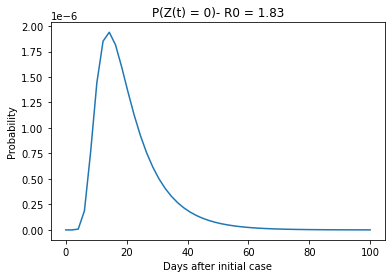

In [176]:
# Disease Parameters

Reff_vec = np.array((1.22, 1.54, 1.79, 2.52, 2.94)) # R without immunity for wildtype with roadmap changes
rtrans_variant = 1.5 # Relative transmissability of SA variant compared to wildtype
gamma = 0.4 # Recovery Rate
sigma = 0.3 # Progression rate from exposed to infectious
Reff = Reff_vec[0]

# Vaccine parameters for transmission reduction 

sus_uk = 1-0.9 # Susceptibility of unvaccinated B.1.351 recovereds against wildtype
sus_sa = 1-0.4 # Susceptibility of unvaccinated wildtype recovereds against B.1.351
az_vac_uk = 1-0.6 # Reduction in transmission of UK variant due to AstraZeneca vaccine
pfi_vac_uk = 1-0.7 # Reduction in transmission of UK variant due to Pfizer vaccine
new_vac_uk = 1-0.6 # Reduction in transmission of UK variant due to new vaccine
az_vac_sa = 1-0.1 # Reduction in transmission of SA variant due to AstraZeneca vaccine
pfi_vac_sa = 1-0.5 # Reduction in transmission of SA variant due to Pfizer vaccine
new_vac_sa = 1-0.9 # Reduction in transmission of SA variant due to new vaccine
vaccine_vec = np.array((1., az_vac_sa, pfi_vac_sa, new_vac_sa))

beta_SA = Reff*gamma*rtrans_variant
k = 1/10
time = np.linspace(0, 100)
RV = Reff*rtrans_variant

ntypes = 16
nsus_trans = int(ntypes/2)

# Probability of extinction with immigration

omega_infectious = beta_SA*np.ones(nsus_trans)
omega_infectious[1::2] *= sus_sa
for i in range(0, len(vaccine_vec)):
    omega_infectious[2*i:2*i+2]*= vaccine_vec[i]
omega_infectious += gamma
om_vec = np.append(sigma*np.ones(nsus_trans), omega_infectious)

def omega(t): # Return vector of lifetimes for each state
    return om_vec

beta_vec = beta_SA*np.ones(nsus_trans)
for i in range(0, len(vaccine_vec)):
    beta_vec[2*i:2*i+2]*= vaccine_vec[i]
    
def P(u, t):
    pvec = np.zeros_like(u)
    nexposed = int(len(u)/2)
    immunity_vec = np.ones(nexposed)
    immunity_vec[1::2]*= sus_sa
    for i in range(0, len(vaccine_vec)):
        immunity_vec[2*i:2*i+2]*= vaccine_vec[i]
    sum_gen_funcs = np.sum(immunity_vec*(1+(1/k)*(1-u[:nexposed]))**(-k))/nexposed
#     sum_gen_funcs = np.sum(immunity_vec*(u[:nexposed]))/nexposed

    for nex in range(0, nexposed):
        pvec[nex] = u[nex+nexposed] 
        pvec[nex+nexposed] = (beta_SA/(beta_SA + gamma)) * u[nex+nexposed] * sum_gen_funcs + (gamma/(beta_SA + gamma))
    return pvec
im_vec = np.zeros(ntypes)
im_vec[0] = 1/5
def eta(t):
    return im_vec.astype(float)
ics = np.zeros(ntypes+1)
ics[-1] = 1.
n0vec = np.ones(ntypes)
n0vec[-1] = 0


offspring = P
outbreak = MTBP_extinct(offspring)
outbreak.set_lifespans(omega)
outbreak.set_immigration(eta)
rho = outbreak.solve_odes(outbreak.set_odes, time, ics, n0vec, Full = False)


plt.plot(time, rho[-1, :])

plt.title("P(Z(t) = 0)- R0 = " + str(RV))
plt.xlabel("Days after initial case")
plt.ylabel("Probability")
plt.savefig("./pnocases_R0=" + str(RV) + ".pdf")

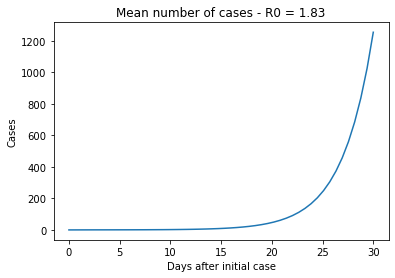

In [177]:
# Mean over time 


const_vec = np.array((1., sus_sa, az_vac_sa, az_vac_sa*sus_sa, pfi_vac_sa, pfi_vac_sa*sus_sa, new_vac_sa, new_vac_sa*sus_sa))
time = np.linspace(0, 30)


def Omega(u, t):
    nexposed = int(ntypes/2)
    Omat = np.zeros((ntypes, ntypes))
    for nex in range(0, nexposed):
        Omat[nex, ntypes-nex-1] = 1
        Omat[nex+nexposed, :nexposed] = (const_vec[nex]/len(const_vec))*beta_SA/(beta_SA*gamma)
        Omat[nex+nexposed, nex+nexposed] = (np.sum(const_vec)/len(const_vec)) * beta_SA/(beta_SA + gamma)
    Omat -= np.identity(ntypes)
    Omat*= (beta_SA + gamma)
    return Omat
outbreak.set_Omega(Omega)
n0s = np.zeros(ntypes)
Mvec = outbreak.solve_mean_odes(outbreak.set_mean_odes, time, n0s)
plt.plot(time, np.sum(Mvec/(1-rho[-1, :]), axis=0))
plt.title("Mean number of cases - R0 = " + str(RV))
plt.xlabel("Days after initial case")
plt.ylabel("Cases")
plt.savefig("./meancases_R0=" + str(RV) + ".pdf")

array([-1.132   , -0.766   ,  0.      ,  0.021225,  0.035375,  0.106125,
        0.176875,  0.191025,  0.21225 ,  0.318375,  0.35375 ,  1.132   ])

In [150]:
np.diag(Omega(n0s, 1))

array([-1.132, -1.132, -1.132, -1.132, -1.132, -1.132, -1.132, -1.132,
       -0.766, -0.766, -0.766, -0.766, -0.766, -0.766, -0.766, -0.766])

# Earlier Work

4it [00:00, 209.21it/s]


Text(0.5, 1.0, 'Expected number of cases over time')

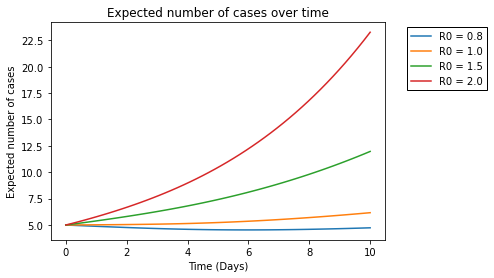

In [40]:
time = np.linspace(0, 10)
gam = 1/7
Tmax = time[-1]
Rvec = np.array([0.8, 1.0, 1.5, 2])
kran = np.arange(0.1, 1.1, 0.01)
k = 1/10
lr = len(Rvec)
im = 1/50
n0 = 5.
ics_q = np.array((0., 1.))
rho_mat = np.zeros((lr, len(time)))
M_mat = np.zeros((lr, len(time)))
def eta(t):
    return float(im)
plt.figure()
for r, R in tqdm(enumerate(Rvec)):
    beta = R*gam
    def omega(t):
        return beta + gam
    def P(u, t):
        p = (beta/(beta+gam))*((1 + (1/k)*(1-u))**(-k))*u + gam/(beta+gam)
        return p
    offspring = P
    outbreak = MTBP_extinct(offspring)
    outbreak.set_lifespans(omega)
    outbreak.set_immigration(eta)
    def Omega(u, t):
        return beta-gam
    rho = outbreak.solve_odes(outbreak.set_odes, time, ics_q, n0)
    rho_mat[r, :] = rho[-1,:] 
    def dOdt(u, t):
        deriv = u*Omega(u, t) + eta(t)
        return deriv
    method = ForwardEuler(dOdt)
    method.set_ic(u0=n0)
    M, t = method.solver(time_points=time)
    M_mat[r, :] = M

    plt.plot(time, M_mat[r, :]/(1-rho_mat[r, :]), label = 'R0 = ' + str(R))
plt.legend(loc=2, bbox_to_anchor=(1.05, 1), framealpha=1., edgecolor='black', fancybox=False)
plt.xlabel('Time (Days)')
plt.ylabel('Expected number of cases')
plt.title("Expected number of cases over time")

In [10]:
time = np.linspace(0, 1000)
gam = 1/7
Tmax = time[-1]
Rvec = np.array([1.5, 2, 2.5, 3, 3.5, 4])
kran = np.arange(0.1, 1.1, 0.01)
k = 1/10
lr = len(Rvec)

etaran = np.arange(1/100, 1., 0.01)
le = len(etaran)
n0= 0.
ics = np.array((0., 1.)) # Should always be 0 for q, 1 for r
rho_mat = np.zeros((lr, len(time)))
rho_final_mat = np.zeros((lr, le))
del_mat = np.zeros_like(rho_final_mat)
for r, R in enumerate(Rvec):
    beta = R*gam
    def omega(t):
        return beta + gam
    for e, im in enumerate(etaran):
        def eta(t):
            return float(im) # Immigration rate
        def P(u, t):
            p = (beta/(beta+gam))*((1 + (1/k)*(1-u))**(-k))*u + gam/(beta+gam)
            return p
        offspring = P
        outbreak = MTBP_extinct(offspring)
        outbreak.set_lifespans(omega)
        outbreak.set_immigration(eta)
        
        rho = outbreak.solve_odes(outbreak.set_odes, time, ics, n0)
        rho_mat[r, :] = rho[-1,:] 
        rho_final_mat[r, e] = rho[-1,-1]
        
        


<ipython-input-10-47c535a5fa83>:24: RuntimeWarning: invalid value encountered in power
  p = (beta/(beta+gam))*((1 + (1/k)*(1-u))**(-k))*u + gam/(beta+gam)


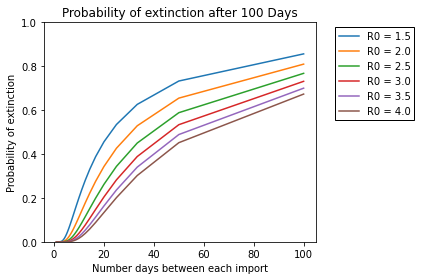

In [684]:
for r, R in enumerate(Rvec):
    plt.plot(1/etaran, rho_final_mat[r,:], label = 'R0 = ' + str(R))
plt.legend(loc=2, bbox_to_anchor=(1.05, 1), framealpha=1., edgecolor='black', fancybox=False)
plt.xlabel('Number days between each import')
plt.ylabel('Probability of extinction')
plt.title("Probability of extinction after " + str(int(Tmax)) + " Days")
# plt.xlim((0.0,1))
plt.ylim((0, 1))
plt.tight_layout()
plt.savefig('./var_im.pdf')


In [108]:
time = np.linspace(0, 100, 101)
gam = 1/7
Tmax = time[-1]
Rvec = np.array([1.5, 2, 2.5, 3, 3.5, 4])
kvec = np.array((-1., 1/10, 1., 10.)) # Different dispersion parameters for NB - large k corresponds to Poisson distribution.
cran = np.arange(0., 1.01, 0.01) # Reduction in transmission (beta) or, equivalently, in R
lk = len(kvec) 
# cran = np.array((0, 1))
lc = len(cran)
k = 1/10
lr = len(Rvec)
def eta(t):
    return float(1/50.) # Immigration rate
etaran = np.arange(1/100, 2., 0.01)
le = len(etaran)
n0= 0.
ics = np.array((0., 1.)) # Should always be 0 for q, 1 for r
rho_mat = np.zeros((lk, lr, lc, len(time)))
rho_final_mat = np.zeros((lk, lr, lc))
del_mat = np.zeros_like(rho_final_mat)
for k, K in enumerate(kvec):
    for r, R in enumerate(Rvec):
        beta = R*gam
        def omega(t):
            return c*beta + gam
        for i, c in enumerate(cran):
            def P(u, t):
                p = (c*beta/(c*beta+gam))*(np.power((1 + (1/K)*(1-u)), -K))*u + gam/(c*beta+gam)
                return p
#             def P(u, t):
#                 p = (c*beta/(c*beta+gam))*u**2 + gam/(c*beta+gam)
#                 return p
            offspring = P
            outbreak = MTBP_extinct(offspring)
            outbreak.set_lifespans(omega)
            outbreak.set_immigration(eta)

            rho = outbreak.solve_odes(outbreak.set_odes, time, ics, n0)
            rho_mat[k, r, i, :] = rho[1,:] 
            rho_final_mat[k, r, i] = rho[-1,-1]
#             rho_final_mat[k, r, i] = (gam*(1-np.exp((beta*c - gam)*Tmax)))/(gam- beta*c*np.exp((beta*c - gam)*Tmax))


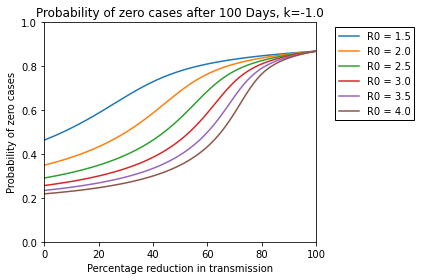

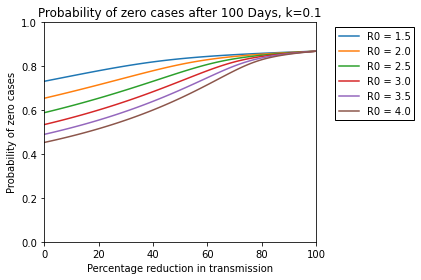

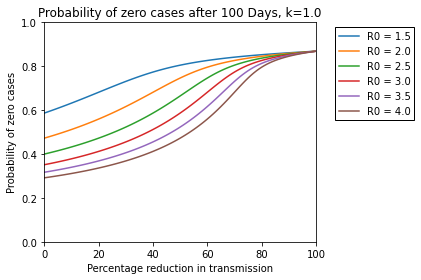

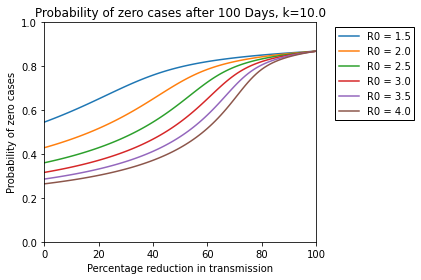

In [109]:
for k, K in enumerate(kvec):
    plt.figure(k)
    for r, R in enumerate(Rvec):
        plt.plot((1-cran)*100, rho_final_mat[k, r,:], label = 'R0 = ' + str(R))
    plt.legend(loc=2, bbox_to_anchor=(1.05, 1), framealpha=1., edgecolor='black', fancybox=False)
    plt.xlabel('Percentage reduction in transmission')
    plt.ylabel('Probability of zero cases')
    plt.title("Probability of zero cases after " + str(int(Tmax)) + " Days, k=" + str(K))
    plt.xlim((0.0,100.))
    plt.ylim((0, 1))
    plt.tight_layout()
    plt.savefig('./var_c_SSE_k=' + str(K) + '_eta=' + str(int(1/eta(0))) + '.pdf')

array([5., 5., 5., 5., 5.])

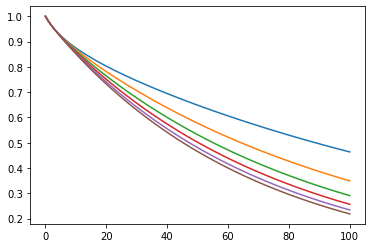

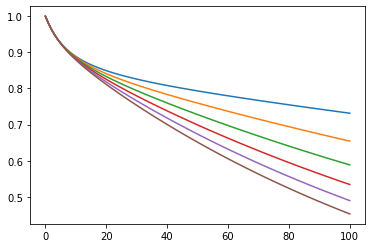

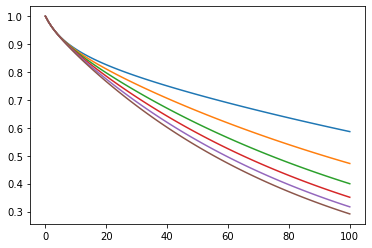

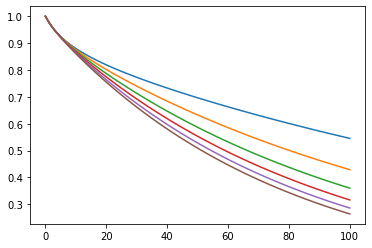

In [110]:
for r in range(0, len(Rvec)):
    for k in range(0, len(kvec)):
        plt.figure(k)
        plt.plot(time, rho_mat[k, r,-1 , :])